# Execução do Knn com normalização

Seja o dataset “toothgrowth” disponível no site:
https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/ToothGrowth.html

Ele guarda as observações de um estudo do crescimento dos incisivos de 60 porquinhos-da-índia que são separado em três grupos que recebem dosagens diárias de vitamina C diferentes. Em cada grupo, metade dos porquinhos recebem na forma de suco de laranja (OJ) e metade recebe na forma de vitamina C sintética (VC)
Código para a visualização dos dados:

(0.42391577060931906,
 2.0760842293906805,
 2.7133305739514344,
 35.38666942604856)

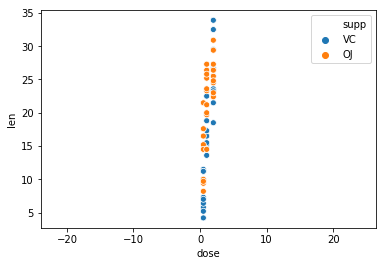

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv"
df = pd.read_csv(url)
df = df[['dose', 'len', 'supp']] #Remove a primeira coluna
sns.scatterplot('dose', 'len', hue='supp', data=df)
plt.axis('equal')

Observe a dimensão “dose” indica um valor na unidade miligramas, e a dimensão “len” está em uma unidade de comprimento. Para calcular as distâncias de um ponto a outro neste espaço de atributos, temos que somar as diferenças de dosagens (mg) e as diferenças de comprimento (décimos de mm), o que não faz sentido fisicamente falando

Observe também que as tratar as distâncias em todas as direções (coordenadas) de forma igualitária não é razoável, uma vez que pequenas diferenças  em determinados atributos  são importantes para definir a classe da amostra, porém diferenças maiores aplicadas a outros atributos parecem não fazer tanta diferença

Dessa forma, melhores resultados serão alcançados se fizermos um ajuste de escala nos dados, de forma equalizar a importância dos atributos para efeito de classificação. A esse ajuste vamos chamar de **normalização dos dados**.
Uma normalização simples, mas efetiva, é aquela que torna cada vetor de atributos um conjunto de dados de *média zero* e *desvio padrão unitário*.

Para tanto, basta deduzir os valores de cada vetor de atributos de sua média (`mean`) e dividir pelo desvio padrão (standard deviation, ou `std`)

No Python, podemos operar sobre todos os campos de dados do DataFrame:  

In [4]:
data = df[['dose', 'len']]
data_norm = (data - data.mean())/data.std()

## Executando o KNN

Cada linha do dataframe `data_norm` de corresponde a uma amostra de treinamento. 

Dada uma amostra de teste `x`, temos que normalizar os atributos com os mesmos dados obtidos na fase de treinamento, ou seja, para a amostra de teste `x`, sua versão normalizada é:

In [5]:
import numpy as np
x = np.array([1.5, 10])
x_norm = (x - data.mean())/data.std()

Para calcularmos as distâncias temos que primeiro calcular as diferenças entre as coordenadas (colunas numéricas) de cada linha de `data_norm` para as coordenadas de `x_norm`, fazendo a matriz de diferenças:

In [9]:
D = data_norm - x_norm
# D

Embora o número de colunas de `data_norm` e `x_norm` seja o mesmo, o dataframe contém várias entradas (linhas) enquanto a amostra de teste só tem uma. As operações entre essas matrizes se baseiam no princípio do *broadcasting*, pelo qual a dimensão unitária de um array é repetida várias vezes para casar com a mesma dimensão do outro array que está sendo processado.

Mostrando os dados normalizados

(-1.1804441748493952,
 1.4454688816940497,
 -2.1062151234852635,
 2.168094301254392)

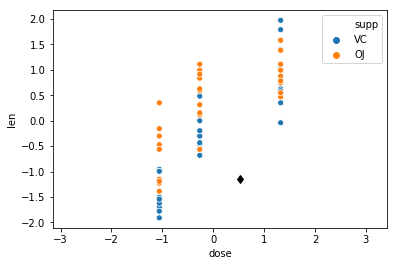

In [10]:
sns.scatterplot('dose', 'len', hue=df['supp'], data=data_norm)
plt.plot(x_norm[0], x_norm[1], 'kd')
plt.axis('equal')

Cálculo do vetor de distâncias ao quadrado, onde a soma é feita ao longo da segunda dimensão (eixo das colunas) de `D`: 

In [11]:
print(D.info())
dists2 = (D ** 2).sum(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
dose    60 non-null float64
len     60 non-null float64
dtypes: float64(2)
memory usage: 1.0 KB
None


Ordenação do vetor de distâncias quadráticas e recuperação dos índices:

In [12]:
idx = np.argsort(dists2)

Agora as distâncias ordenadas podem ser recuperadas através de: `dists2_ord = dists2[idx]`.
Contando os `k` vizinhos pertencentes a cada classe:

In [13]:
k = 7
n_OJ = np.count_nonzero(df['supp'][idx[:k]]=='OJ')
n_VC = np.count_nonzero(df['supp'][idx[:k]]=='VC')

classe = ['OJ', 'VC'][np.argmax([n_OJ, n_VC])]
print("A classe para k = ", k, "é: ", classe)

A classe para k =  7 é:  VC


## Exercício:

Dado  o dataframe `peixes` abaixo Qual é o resultado da classificação por kNN para o vetor de teste v=(x=4,0; l=20,8), considerando k=1 e k=3, respectivamente, realizando a normalização pelo desvio padrão?

In [ ]:
peixes =  pd.DataFrame.from_dict({
    "especie": ["Salmão", "Badejo", "Badejo", "Badejo", "Salmão", "Salmão"],
    "brilho" : [3.5, 3.5, 3.5, 3.5, 4.5, 5],
    "comprimento" : [21, 21.5, 20.2, 20, 21, 21] 
})
peixes